In [184]:
import os
import pandas as pd
import numpy as np
import csv
import glob
import mpld3
mpld3.enable_notebook()
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [185]:
path = '/Users/gcezar/Documents/Powernet/Farm/BES_Input_D3MI'
files = []
all_files = glob.glob(os.path.join(path, "*.csv"))
            
# file = '~/Documents/Powernet/Farm/BES_Input_D3MI/'
# data = pd.read_csv(file)
# data.head()

In [186]:
all_files[25]

'/Users/gcezar/Documents/Powernet/Farm/BES_Input_D3MI/BES_Report_D3MI_0334726159_20190918.csv'

In [187]:
file = all_files[1]
data = pd.read_csv(file, names=list(range(0,6)))
data.head(15)

,0,1,2,3,4,5
0,DOUBLE DIAMOND DAIRY & RANCH,NaN,NaN,NaN,NaN,NaN
1,505 E WASHINGTON RD,NaN,NaN,NaN,NaN,NaN
2,Account# 3423052964,NaN,NaN,NaN,NaN,NaN
3,SA_ID# 0330174190,NaN,NaN,NaN,NaN,NaN
4,SP_ID# 7241403005,MTR_NBR# 1010113707,NaN,NaN,NaN,NaN
5,08-30-2019,09-18-2019,NaN,NaN,NaN,NaN
6,sa_id,sp_id,ener_dir_cd,elec_intvl_end_dttm,uom,usgamount
7,0330174190,7241403005,D,2019-08-30 00:15:00,KWH,24.0000000
8,0330174190,7241403005,D,2019-08-30 00:30:00,KWH,34.3200000
9,0330174190,7241403005,D,2019-08-30 00:45:00,KWH,38.6400000


In [188]:
# Finding index of where the file starts
idx_start = data.loc[data[0]=='sa_id'].index[0]
data.columns = list(data.iloc[6])

In [189]:
data.drop(['elec_intvl_end_dttm'], axis=1, inplace=True)

In [190]:
data.head(15)

,sa_id,sp_id,ener_dir_cd,uom,usgamount
0,DOUBLE DIAMOND DAIRY & RANCH,NaN,NaN,NaN,NaN
1,505 E WASHINGTON RD,NaN,NaN,NaN,NaN
2,Account# 3423052964,NaN,NaN,NaN,NaN
3,SA_ID# 0330174190,NaN,NaN,NaN,NaN
4,SP_ID# 7241403005,MTR_NBR# 1010113707,NaN,NaN,NaN
5,08-30-2019,09-18-2019,NaN,NaN,NaN
6,sa_id,sp_id,ener_dir_cd,uom,usgamount
7,0330174190,7241403005,D,KWH,24.0000000
8,0330174190,7241403005,D,KWH,34.3200000
9,0330174190,7241403005,D,KWH,38.6400000


[0, 1, 2, 3, 4, 5]

In [191]:
def list_files_in_folder(path='/Users/gcezar/Documents/Powernet/Farm/BES_Input_D3MI'):
    files = []
    return glob.glob(os.path.join(path, "*.csv"))
    
def load_file(file_path):
    data = pd.read_csv(file_path, names=list(range(0,6)))
    # Finding index of where the file starts
    idx_start = data.loc[data[0]=='sa_id'].index[0]
    data.columns = list(data.iloc[idx_start])
    # droping headers
    lst = list(range(0,idx_start+1))
    data.drop(data.index[lst], inplace=True)
    # setting datetime as index
    data['datetime'] = pd.to_datetime(data['elec_intvl_end_dttm'])
    data['date'] = data['datetime'].dt.date
    data['hour'] = data['datetime'].dt.hour
    data.set_index('datetime', inplace=True)
    data.drop(['elec_intvl_end_dttm'], axis=1, inplace=True)
    # making kwh float
    data['usgamount'] = data['usgamount'].astype(float)
    data
    return data

In [192]:
files = list_files_in_folder()



In [193]:
df = load_file(files[1])
df.columns

Index(['sa_id', 'sp_id', 'ener_dir_cd', 'uom', 'usgamount', 'date', 'hour'], dtype='object')

In [194]:
df.head()

,sa_id,sp_id,ener_dir_cd,uom,usgamount,date,hour
datetime,,,,,,,
2019-08-30 00:15:00,0330174190,7241403005,D,KWH,24.00,2019-08-30,0
2019-08-30 00:30:00,0330174190,7241403005,D,KWH,34.32,2019-08-30,0
2019-08-30 00:45:00,0330174190,7241403005,D,KWH,38.64,2019-08-30,0
2019-08-30 01:00:00,0330174190,7241403005,D,KWH,27.48,2019-08-30,1
2019-08-30 01:15:00,0330174190,7241403005,D,KWH,15.72,2019-08-30,1


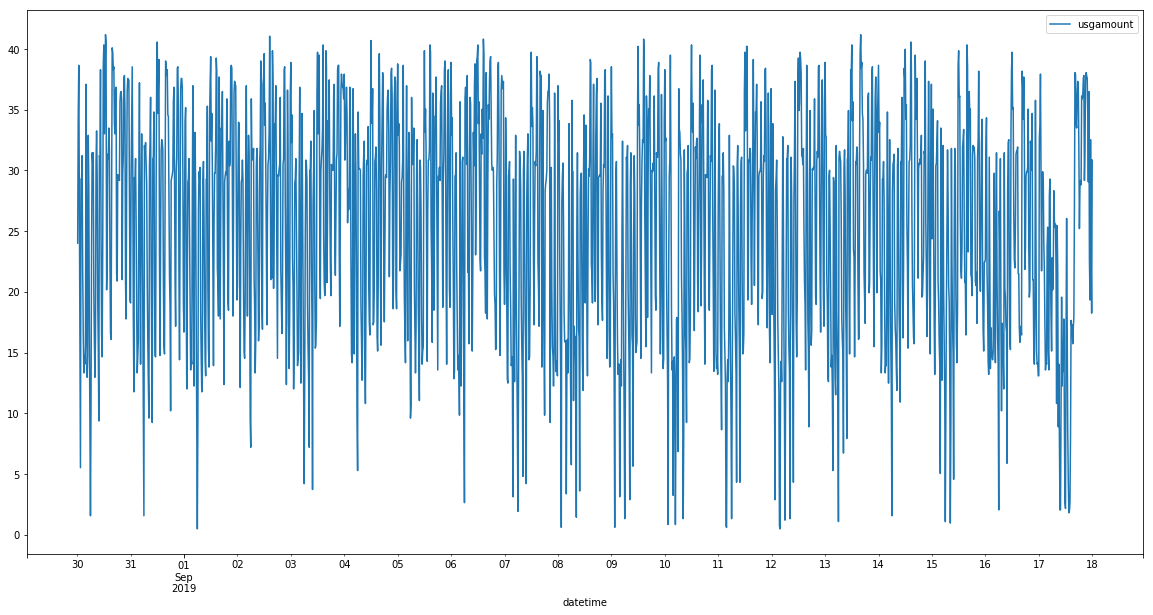

In [195]:
df.plot(y='usgamount')
plt.show()
# df.head()

# usage.plot()
# ax.set_ylabel('Energy [kWh]')
# plt.show()

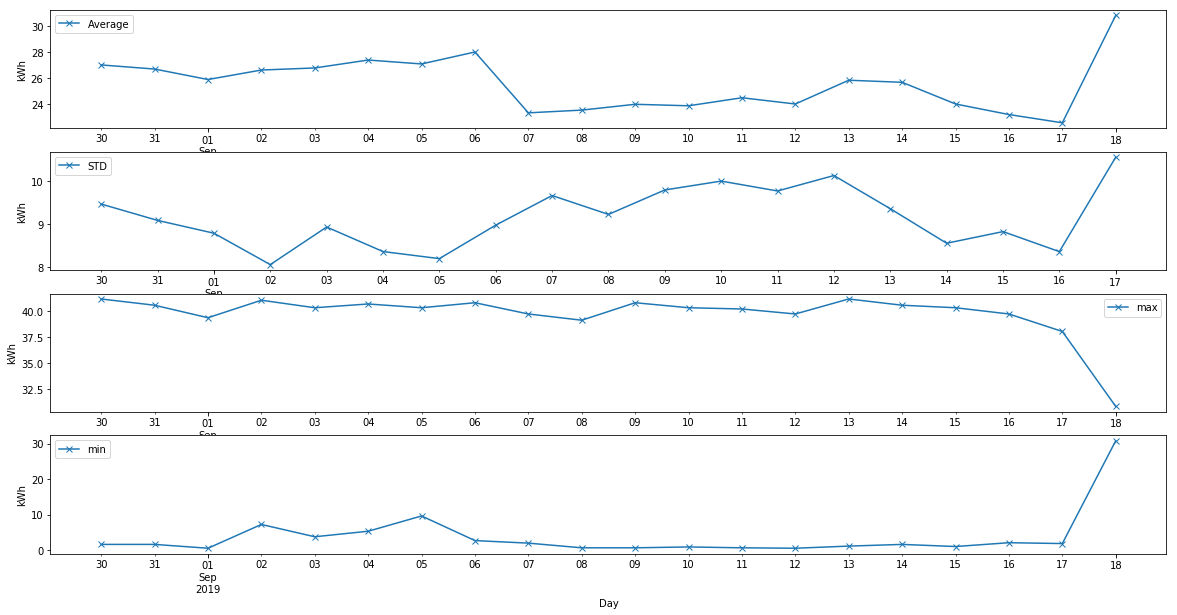

In [196]:
# Average daily energy consumption
daily_avg = df.usgamount.resample('D').mean()
daily_std = df.usgamount.resample('D').std()
daily_max = df.usgamount.resample('D').max()
daily_min = df.usgamount.resample('D').min()

fig = plt.figure()
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

daily_avg.plot(marker='x',ax=ax1, label='Average')
daily_std.plot(marker='x',ax=ax2, label='STD')
daily_max.plot(marker='x',ax=ax3, label='max')
daily_min.plot(marker='x',ax=ax4, label='min')
ax4.set_xlabel('Day')
ax1.set_ylabel('kWh')
ax2.set_ylabel('kWh')
ax3.set_ylabel('kWh')
ax4.set_ylabel('kWh')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

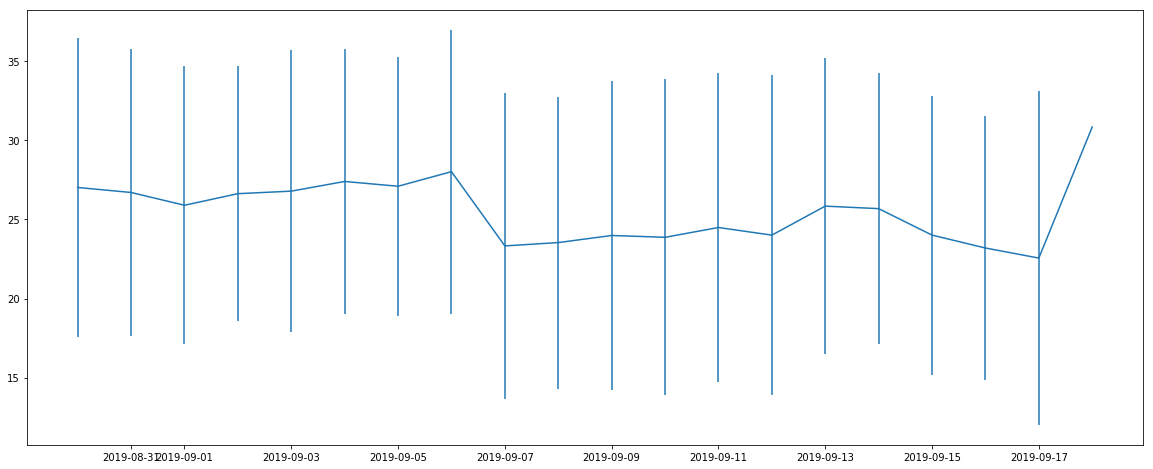

In [197]:
# Understand meter at hourly level for each day

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
ax.errorbar(x=lst_group_day,y=daily_avg, yerr=daily_std)
plt.show()
# daily_avg
# daily_std

In [198]:
df_date = df.groupby('date')
df_date_hour = df.groupby(['date', 'hour'])

In [199]:
# Listing unique elements from groups [day]
lst_group_day = df.date.unique()
lst_group_day[0]

datetime.date(2019, 8, 30)

In [200]:
# getting elements from groups
day = df_date.get_group(lst_group_day[0])
day.plot(x='datetime', y='usgamount', marker='x')
plt.show()

KeyError: 'datetime'

In [138]:
new_day_df = df_date[['datetime', 'usgamount']]
new_day_df.set_index('datetime', inplace=True)
avg = new_day_df.resample('D').mean()
avg

AttributeError: Cannot access callable attribute 'set_index' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [94]:
for idx,i in enumerate(files):
    load_file(i)

,sa_id,sp_id,ener_dir_cd,uom,usgamount,datetime,date,hour
7,0330174190,7241403005,D,KWH,24.00,2019-08-30 00:15:00,2019-08-30,0
8,0330174190,7241403005,D,KWH,34.32,2019-08-30 00:30:00,2019-08-30,0
9,0330174190,7241403005,D,KWH,38.64,2019-08-30 00:45:00,2019-08-30,0
10,0330174190,7241403005,D,KWH,27.48,2019-08-30 01:00:00,2019-08-30,1
11,0330174190,7241403005,D,KWH,15.72,2019-08-30 01:15:00,2019-08-30,1
12,0330174190,7241403005,D,KWH,5.52,2019-08-30 01:30:00,2019-08-30,1
13,0330174190,7241403005,D,KWH,29.28,2019-08-30 01:45:00,2019-08-30,1
14,0330174190,7241403005,D,KWH,29.28,2019-08-30 02:00:00,2019-08-30,2
15,0330174190,7241403005,D,KWH,31.20,2019-08-30 02:15:00,2019-08-30,2
16,0330174190,7241403005,D,KWH,21.60,2019-08-30 02:30:00,2019-08-30,2


In [181]:

hour = datetime.datetime.today().hour
minute = int(datetime.datetime.today().minute)
int(minute/15)

2

In [161]:
s = [{u'a3': 13.609999656677246, u'grid_power': 0, u'pv_power': 50.63999938964844, u'btp': 14, u'pvc': 0.23999999463558197, u'pvv': 211, u'ambient_temp': 0, u'total_power': 46.41999816894531, u'dcc': 0.2199999988079071, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 59.18000030517578, u'igtp': 17, u'a4': 3.2300000190734863, u'time': u'2019-10-02T16:00:01Z', u'dcv': 211, u'serial_number': 697146}, {u'a3': 13.34000015258789, u'grid_power': 0, u'pv_power': 25.31999969482422, u'btp': 13, u'pvc': 0.11999999731779099, u'pvv': 211, u'ambient_temp': 0, u'total_power': 23.209999084472656, u'dcc': 0.10999999940395355, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 56.439998626708984, u'igtp': 18, u'a4': 3.240000009536743, u'time': u'2019-10-02T15:59:53Z', u'dcv': 211, u'serial_number': 766935}, {u'a3': 14.029999732971191, u'grid_power': 0, u'pv_power': 21.200000762939453, u'btp': 16, u'pvc': 0.10000000149011612, u'pvv': 212, u'ambient_temp': 0, u'total_power': 0, u'dcc': 0, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 52.52000045776367, u'igtp': 17, u'a4': 3.240000009536743, u'time': u'2019-10-02T15:59:49Z', u'dcv': 211, u'serial_number': 697151}, {u'a3': 13.779999732971191, u'grid_power': 0, u'pv_power': 50.63999938964844, u'btp': 13, u'pvc': 0.23999999463558197, u'pvv': 211, u'ambient_temp': 0, u'total_power': 4.21999979019165, u'dcc': 0.019999999552965164, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 59.060001373291016, u'igtp': 17, u'a4': 3.0299999713897705, u'time': u'2019-10-02T15:59:50Z', u'dcv': 211, u'serial_number': 697157}, {u'a3': 13.390000343322754, u'grid_power': 0, u'pv_power': 18.989999771118164, u'btp': 13, u'pvc': 0.09000000357627869, u'pvv': 211, u'ambient_temp': 0, u'total_power': 16.8799991607666, u'dcc': 0.07999999821186066, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 57.95000076293945, u'igtp': 18, u'a4': 3.2300000190734863, u'time': u'2019-10-02T15:59:56Z', u'dcv': 211, u'serial_number': 697145}, {u'a3': 13.699999809265137, u'grid_power': 0, u'pv_power': 44.52000045776367, u'btp': 17, u'pvc': 0.20999999344348907, u'pvv': 212, u'ambient_temp': 0, u'total_power': 29.540000915527344, u'dcc': 0.14000000059604645, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 55.939998626708984, u'igtp': 17, u'a4': 3.240000009536743, u'time': u'2019-10-02T15:59:50Z', u'dcv': 211, u'serial_number': 766929}, {u'a3': 13.399999618530273, u'grid_power': 55.119998931884766, u'pv_power': 23.31999969482422, u'btp': 15, u'pvc': 0.10999999940395355, u'pvv': 212, u'ambient_temp': 0, u'total_power': 78.44000244140625, u'dcc': 0.3700000047683716, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 57.16999816894531, u'igtp': 16, u'a4': 3.2300000190734863, u'time': u'2019-10-02T15:59:57Z', u'dcv': 212, u'serial_number': 697147}, {u'a3': 12.90999984741211, u'grid_power': 0, u'pv_power': 25.440000534057617, u'btp': 16, u'pvc': 0.11999999731779099, u'pvv': 212, u'ambient_temp': 0, u'total_power': 23.209999084472656, u'dcc': 0.10999999940395355, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 58.119998931884766, u'igtp': 17, u'a4': 3.2300000190734863, u'time': u'2019-10-02T15:59:51Z', u'dcv': 211, u'serial_number': 697144}, {u'a3': 13.029999732971191, u'grid_power': 23.209999084472656, u'pv_power': 16.8799991607666, u'btp': 13, u'pvc': 0.07999999821186066, u'pvv': 211, u'ambient_temp': 0, u'total_power': 40.09000015258789, u'dcc': 0.1899999976158142, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 56.86000061035156, u'igtp': 17, u'a4': 3.2300000190734863, u'time': u'2019-10-02T16:00:00Z', u'dcv': 211, u'serial_number': 766944}, {u'a3': 14.0600004196167, u'grid_power': 0, u'pv_power': 18.989999771118164, u'btp': 13, u'pvc': 0.09000000357627869, u'pvv': 211, u'ambient_temp': 0, u'total_power': 14.699999809265137, u'dcc': 0.07000000029802322, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 59.84000015258789, u'igtp': 18, u'a4': 3.240000009536743, u'time': u'2019-10-02T16:00:02Z', u'dcv': 210, u'serial_number': 697160}, {u'a3': 13.279999732971191, u'grid_power': 112.25, u'pv_power': 23.43000030517578, u'btp': 14, u'pvc': 0.10999999940395355, u'pvv': 213, u'ambient_temp': 0, u'total_power': 135.67999267578125, u'dcc': 0.6399999856948853, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 56.95000076293945, u'igtp': 17, u'a4': 3.2300000190734863, u'time': u'2019-10-02T16:00:00Z', u'dcv': 212, u'serial_number': 697149}, {u'a3': 13.5, u'grid_power': 22.709999084472656, u'pv_power': 82.29000091552734, u'btp': 16, u'pvc': 0.38999998569488525, u'pvv': 211, u'ambient_temp': 0, u'total_power': 105, u'dcc': 0.5, u'a1': 0.029999999329447746, u'frq': 0, u'a2': 57.25, u'igtp': 17, u'a4': 3.2300000190734863, u'time': u'2019-10-02T16:00:02Z', u'dcv': 210, u'serial_number': 766940}, {u'a3': 13.930000305175781, u'grid_power': 14.65999984741211, u'pv_power': 23.31999969482422, u'btp': 16, u'pvc': 0.10999999940395355, u'pvv': 212, u'ambient_temp': 0, u'total_power': 37.97999954223633, u'dcc': 0.18000000715255737, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 59.470001220703125, u'igtp': 16, u'a4': 3.240000009536743, u'time': u'2019-10-02T15:59:58Z', u'dcv': 211, u'serial_number': 697156}, {u'a3': 0.25, u'grid_power': 0, u'pv_power': 0, u'btp': 0, u'pvc': 0, u'pvv': 0, u'ambient_temp': 0, u'total_power': 0, u'dcc': 0, u'a1': 283.54998779296875, u'frq': 0, u'a2': 0.10999999940395355, u'igtp': 0, u'a4': 3.2100000381469727, u'time': u'2019-10-02T16:00:09Z', u'dcv': 0, u'serial_number': 282322}, {u'a3': 13.149999618530273, u'grid_power': 0, u'pv_power': 27.43000030517578, u'btp': 15, u'pvc': 0.12999999523162842, u'pvv': 211, u'ambient_temp': 0, u'total_power': 0, u'dcc': 0, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 57.63999938964844, u'igtp': 17, u'a4': 3.2200000286102295, u'time': u'2019-10-02T15:59:54Z', u'dcv': 210, u'serial_number': 697153}, {u'a3': 14.300000190734863, u'grid_power': 0, u'pv_power': 25.440000534057617, u'btp': 16, u'pvc': 0.11999999731779099, u'pvv': 212, u'ambient_temp': 0, u'total_power': 0, u'dcc': 0, u'a1': 0.019999999552965164, u'frq': 0, u'a2': 58.63999938964844, u'igtp': 16, u'a4': 3.2300000190734863, u'time': u'2019-10-02T16:00:01Z', u'dcv': 211, u'serial_number': 766936}]


In [162]:
s[0]

{'a3': 13.609999656677246,
 'grid_power': 0,
 'pv_power': 50.63999938964844,
 'btp': 14,
 'pvc': 0.23999999463558197,
 'pvv': 211,
 'ambient_temp': 0,
 'total_power': 46.41999816894531,
 'dcc': 0.2199999988079071,
 'a1': 0.019999999552965164,
 'frq': 0,
 'a2': 59.18000030517578,
 'igtp': 17,
 'a4': 3.2300000190734863,
 'time': '2019-10-02T16:00:01Z',
 'dcv': 211,
 'serial_number': 697146}

In [171]:
s[0]['frq']

0

In [172]:
np.min(np.asarray([98, 30]))

30

In [182]:
ts=time.time()

In [183]:
ts1 = time.time()-ts
ts1

16.48691725730896